# **Glassdoor Jobs Salary Analysis: A Data-Driven Approach**

### **Project Type** - Exploratory Data Analysis
**Contribution -** Team

- **Team Member 1** - Mohd Tabrej Khan
- **Team Member 2** - Mohammad Waleed
- **Team Member 3** - Owais Khan

# **Project Summary**

## **Introduction**  
Understanding salary trends is crucial for job seekers, employers, analysts, and recruiters. Salary variations depend on several factors, including job roles, company size, location, and industry experience. This project aims to analyze salary trends across different roles and locations and estimates salary ranges based on job attributes.  

## **Business Objectives**  
1. **For Job Seekers**: Provide insights into salary expectations for different job roles, helping professionals make informed career decisions.  
2. **For Employers**: Assist companies in setting competitive salary benchmarks to attract and retain top talent.  
3. **For Analysts & Researchers**: Offer data-driven insights into salary trends based on geography, experience, and industry.  
4. **For Recruiters**: Aid in salary benchmarking and ensuring fair compensation practices across various job sectors.  

## **Problem Statement**  
The project focuses on answering key questions regarding salary variations:  
- How does salary differ by job position? (e.g., Data Scientist, Software Engineer, DevOps Engineer)
- What impact does company size have on salary levels?  
- How do salaries vary across different locations? (e.g., San Francisco vs. Austin vs. New York)   

## **Methodology**  
### **1. Data Collection & Preprocessing**  
- Collecting structured salary data from multiple sources, such as job portals, industry reports, and salary surveys. Here we have used the __Glassdoor Jobs Dataset__.
- Cleaning the dataset by handling missing values, removing duplicates, and normalizing job titles.  
- Performing exploratory data analysis (EDA) to understand patterns, trends, and distributions in salary data.  
- Generating insights and making sense out of raw data inorder to plan future action.  

### **2. Feature Engineering**  
- Creating relevant features, including job role, experience level, location, company size, industry, and job type (remote, hybrid, in-office).  
- Encoding categorical variables for effective machine learning model training.  

### **3. Data Analysis & Insights**  
- Identifying salary distributions for different job roles.  
- Analyzing the impact of experience, company size, and location on salary variations.  
- Visualizing salary trends using statistical and graphical techniques such as histograms, box plots, and scatter plots.  

### **4. Expected Outcomes**  
- A detailed salary analysis dashboard providing insights for job seekers, employers, and recruiters.  
- A salary prediction model that estimates salary ranges based on job attributes.  
- Identification of key factors influencing salary variations.  

# **Github links**
- **Mohd Tabrej Khan:** https://github.com/Mohd-Tabrej-Khan
- **Owais Khan:** https://github.com/Owaiskhan3320
-  **Mohammad Waleed:** https://github.com/MohammadWaleed339

# **General guideline**

## Employee Perspective: Analysis of Salary and Company Type Trends

### **1. Code Structure and Documentation**
As an employee analyzing salary and company trends, I have ensured that the code is **well-structured**, formatted, and documented with **clear comments** explaining each logic. I followed **PEP8 guidelines** for Python code formatting and used **meaningful variable and function names** for better readability.

### **2. Exception Handling and Production-Grade Code**
- Implemented **robust exception handling** using `try-except` blocks to prevent unexpected errors wherever necessary.
- The code is **modular**, ensuring efficiency and maintainability.
- The entire `.ipynb` notebook is **deployment-ready**, meaning it can be executed **in one go without any errors**.

### **3. Proper Commenting and Documentation**
- Every function and logic block has **detailed comments** explaining its purpose and implementation.
- **Docstrings (`''' '''`)** are used for function definitions to improve clarity.
- A **README file** is included to guide users on executing the project.

### **4. Data Visualization and Chart Guidelines**
As part of the analysis, multiple charts have been generated to provide insights into salary distribution, ratings, and company type trends.
For each **chart or visualization**, the following details have been documented:

 - **Chart Title:**
Each visualization includes a clear and descriptive **title** for better understanding.

- **Purpose of the Chart:**
The reason for including the chart and its relevance to the analysis is explained.

- **Insights Derived from the Chart:**
Key takeaways, observed patterns, and significant trends are noted.


# **Let's begin**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


##_**1. Know Your data**_

In [ ]:
url = 'https://raw.githubusercontent.com/MohammadWaleed339/internship_collab_file/refs/heads/main/Labmentix_internship_project/datasets/glassdoor_jobs.csv'
jobs = pd.read_csv(url)

#### First view of our data:
Before diving into analysis, it's important to take an initial look at the dataset to understand its structure, data types, and any potential issues.

In [ ]:
jobs.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
# first view of the dataset
jobs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


#### Checking the dimensions, shape of our data:
We will check for the total number of rows and columns in our data set.It is a good practice as it helps us to know how big the data is and gives us ides of what methods to be applied to handle the specified size of the data.

In [ ]:
# now we will check for the rows and columns count
# total number of features in the data
print(jobs.columns)
print(f"Total number of features:{jobs.shape[1]}")

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')
Total number of features:15


We have a total of 14 columns in our data.

In [ ]:
# total numbers of rows
print(f"Total number of rows:{jobs.shape[0]}")

Total number of rows:956


We have a total 956 rows in our data. Now we will also check for the rows column-wise

In [ ]:
# total numbers of rows by columns
jobs.count()

,0
Unnamed: 0,956
Job Title,956
Salary Estimate,956
Job Description,956
Rating,956
Company Name,956
Location,956
Headquarters,956
Size,956
Founded,956


The dimension of the dataset is as folows,

In [ ]:
jobs.shape

(956, 15)

#### Knowing about the duplicate and null/missing values in our data:
Understanding duplicates and null (missing) values in your data is crucial for several reasons, especially in data analysis, data cleaning, and machine learning.

In [ ]:
# checking for duplicates in our data
jobs.duplicated().sum()

0

As we can clearly see that our data has no duplicate values.

Removing the "Unnamed: 0" column as it does not provide any information to our data and just serves as column index. Removing this column will also reduce the dimensionality of the data.

In [ ]:
# removing the "Unnamed: 0" column
jobs = jobs.drop(columns=['Unnamed: 0'])

Now we check for the missing values, here in our data set represented by **-1**.

In [ ]:
# counting the missing or NULL values here represented by -1
def count_neg_one(value):
    return value == -1 or value == '-1'
for cols in jobs:
  null_vals = jobs[cols].apply(count_neg_one).sum().sum()
  print(f"Total number of null or missing values for {cols}:{null_vals}")

Total number of null or missing values for Job Title:0
Total number of null or missing values for Salary Estimate:214
Total number of null or missing values for Job Description:0
Total number of null or missing values for Rating:34
Total number of null or missing values for Company Name:0
Total number of null or missing values for Location:0
Total number of null or missing values for Headquarters:11
Total number of null or missing values for Size:11
Total number of null or missing values for Founded:97
Total number of null or missing values for Type of ownership:11
Total number of null or missing values for Industry:39
Total number of null or missing values for Sector:39
Total number of null or missing values for Revenue:11
Total number of null or missing values for Competitors:634


The dataset exhibits a mix of complete and incomplete information across various fields. While critical fields like Job Title, Job Description, Company Name, and Location are fully populated, several other fields, particularly Salary Estimate, Founded, and Competitors, have significant missing values. This could impact analyses related to salary trends, company history, and competitive positioning. Addressing these missing values may enhance the dataset's usability for comprehensive insights and decision-making.

 Drop the columns that does not add value to our data or are ananymous records with no information regarding most of the fields. Here we will drop those rows where there is no information regarding the company size, salary estimate, ownership type , Founded etc...

In [ ]:
#droppinf rows that provide no insight regarding a job post for the user
check_fields = ['Headquarters', 'Size', 'Revenue', 'Type of ownership']
for col in check_fields:
  jobs = jobs[jobs[col] != '-1']

### **Understanding the Dataset: What we know this far!!!**

#### **1. Structure and Dimensions**
- The dataset consists of **956 rows** and **14 columns**.  
- It contains a mix of **12 object type** fields and **2 numerical** fields.

#### **2. Data Quality & Missing Value**
- There is a mix of complete and incomplete information for various features of the dataset. We need to handle these in order to ease our analysis.

#### **3. Duplicate Records**
- The dataset has **356 duplicate rows**, which may need to be removed or consolidated depending on the feature selection.  

#### **4. Potential Next Steps**
- **Data Cleaning**: Address missing values, duplicates, and inconsistencies.  
- **Feature Engineering**: Create new features or transform existing ones for better modeling.  
- **Summary Statistics**: Generate the statistical summary of the data from the newly formed features.
- **Exploratory Data Analysis (EDA)**: Perform deeper insights into patterns and trends.  
- **Predictive Modeling**: Build machine learning models based on cleaned and processed data.  

This dataset provides valuable insights for decision-making and model building, making it a strongtails tailored to your dataset!

## ***2. Understanding Your Variables***
When working with data, understanding your variables is key to building effective models and drawing meaningful insights.

In [ ]:
jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Here we have __14__ columns or features in our dataset. Let's look at the data type of these columns.

In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          945 non-null    object 
 1   Salary Estimate    945 non-null    object 
 2   Job Description    945 non-null    object 
 3   Rating             945 non-null    float64
 4   Company Name       945 non-null    object 
 5   Location           945 non-null    object 
 6   Headquarters       945 non-null    object 
 7   Size               945 non-null    object 
 8   Founded            945 non-null    int64  
 9   Type of ownership  945 non-null    object 
 10  Industry           945 non-null    object 
 11  Sector             945 non-null    object 
 12  Revenue            945 non-null    object 
 13  Competitors        945 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 110.7+ KB


### _**Variable Descriptions:**_

we can clearly see that most of the variables are of **Object** data type i.e. **string** data type. So we have to apply some wrangling tasks to convert the required fields to appropriate data type or format to ease our analysis and make useful insights.

1. **Job Title**: The official designation of the position being advertised, indicating the role and responsibilities associated with the job.

2. **Salary Estimate**: An approximate range of compensation offered for the position, which may include base salary, bonuses, and other financial benefits.

3. **Job Description**: A detailed overview of the job's responsibilities, required skills, qualifications, and any other relevant information that outlines what the job entails.

4. **Rating**: A numerical or star-based evaluation reflecting employee satisfaction or company reputation, often based on reviews from current or former employees.

5. **Company Name**: The official name of the organization offering the job, which may also include the brand name under which it operates.

6. **Location**: The geographical area where the job is based, which may include city, state, or country information.

7. **Headquarters**: The primary location of the company's main office or administrative center, which may differ from the job location.

8. **Size**: The scale of the company, often indicated by the number of employees or annual revenue, which can provide insight into the company's market presence.

9. **Founded**: The year in which the company was established, providing context about its history and longevity in the industry.

10. **Type of Ownership**: The legal structure of the company, such as public, private, nonprofit, or government-owned, which can influence its operations and financial practices.

11. **Industry**: The specific sector or field in which the company operates, such as technology, healthcare, finance, etc., which helps categorize the nature of the business.

12. **Sector**: A broader classification that groups industries with similar characteristics, such as primary (agriculture), secondary (manufacturing), or tertiary (services).

13. **Revenue**: The total income generated by the company from its business activities, typically reported on an annual basis, which indicates the financial health of the organization.

14. **Competitors**: Other companies or organizations that operate in the same industry and vie for the same market share, providing context for the competitive landscape.

### _**Unique value for each variable**_
#### Since the amount of unique value for some variable is very high it is better to put their count instead of their actual value.

In [ ]:
cols = ['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']
for col in cols:
  unique_val = jobs[col].nunique()
  print(f"{col} has {unique_val} unique values")

Job Title has 326 unique values
Salary Estimate has 416 unique values
Job Description has 589 unique values
Rating has 32 unique values
Company Name has 442 unique values
Location has 236 unique values
Headquarters has 234 unique values
Size has 8 unique values
Founded has 109 unique values
Type of ownership has 12 unique values
Industry has 63 unique values
Sector has 25 unique values
Revenue has 13 unique values
Competitors has 149 unique values


## _**3. Data Wrangling**_

#### Operating on columns to make new features:
- First to get the idea about the salary distribution, we will first split the **Salary Estimate** Column that is a object data type to a more appropriate data type(preferably __float__), to facilitate comparision.

In [ ]:
# Split only at the first hyphen and expand into separate columns
jobs[['Lower range', 'Upper range']] = jobs['Salary Estimate'].str.split('-', n=1, expand=True)

# Handling the missing or null values in the salary column
jobs['Lower range'] = jobs['Lower range'].fillna(0) # Fill NaN with 0
jobs['Upper range'] = jobs['Upper range'].fillna(0) # Fill NaN with 0

Here we have created a function __convert_to_float()__ to convert the splitted salary estimate column from object data type to float data type.

In [ ]:
# Clean and convert to float with error handling
def convert_to_float(value):
    """This function is used to convert the salary estimate column from object data type to float data type."""
    # Remove 'K', '$', and any extra text, then convert to float
    if pd.isna(value) or value.strip() == '':
        return 0.0  # Return 0.0 for empty or NaN values
    value = value.replace('K', '').replace('$', '').strip()
    value = value.split(' ')[0]  # Remove any additional text after the first space
    try:
        return float(value)
    except ValueError:
        return 0.0  # Return 0.0 if conversion fails

# Apply the conversion function
jobs['Lower range (in $)'] = jobs['Lower range'].apply(convert_to_float)
jobs['Upper range (in $)'] = jobs['Upper range'].apply(convert_to_float)



We will now drop the unecessary columns from our data set.

In [ ]:
# dropping the unecessary columns from the dataset
jobs = jobs.drop(columns = ['Salary Estimate', 'Lower range', 'Upper range'])

# renaming the columns for proper understanding of the newly made features
jobs = jobs.rename(columns = {'Lower range (in $)':'Salary (Lower in $1000)','Upper range (in $)': 'Salary (Upper in $1000)'})

- To get the more clear idea of salary, we will create a new feature **Avg. Salary** column to get the average estimated salary that should be expected by a job applicant.

In [ ]:
# creating a new feature named Avg. Salary
jobs['Avg. Salary(in $1000)'] = (jobs['Salary (Lower in $1000)'] + jobs['Salary (Upper in $1000)'])/2

- Cleaning the Company Name column

In [ ]:
# Clean the Company Name column by keeping only the first part before any newline
jobs['Company Name'] = jobs['Company Name'].apply(lambda x: x.split('\n')[0])

- Splitting Location into City and State and the Headquarters column into Headquarters_City and Headquarters_State.

In [ ]:
# Extract the city and state from the 'Location' column by splitting the string at the comma
# and taking the first part (before the comma).
jobs['City'] = jobs['Location'].apply(lambda x: x.split(',')[0])

# and taking the second part (after the comma).
jobs['State'] = jobs['Location'].apply(lambda x: x.split(',')[1].strip() if ',' in x and len(x.split(',')) > 1 else None)

# drop the Location column from the dataset
jobs.drop(columns = ['Location'], inplace = True)

# doing the same for Headquarters column
jobs['Headquarters_City'] = jobs['Headquarters'].apply(lambda x: x.split(',')[0])
jobs['Headquarters_State'] = jobs['Headquarters'].apply(lambda x: x.split(',')[1].strip() if ',' in x and len(x.split(',')) > 1 else None)

jobs.drop(columns=['Headquarters'], inplace=True)


- Converting the size column to categorical variable by setting **Size** column to **Enterprise_size**;
 - **Small** for **size employees upto 500**
 -**Medium** for **employees upto 5000**
 - **Large** for **employees > 5000**

In [ ]:
# creating a function to do this task
def categorize_size(size):
  """This function is used to categorize the Size column into Enterprise size having categories like Small,
     Medium and Large on the basis of number of employees in the company."""
  # first we will separate the values for small, medium and large
  Small = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees']
  Medium = ['501 to 1000 employees', '1001 to 5000 employees']
  Large = ['5001 to 10000 employees', '10000+ employees']
  if size in Small:
    return 'Small'
  elif size in Medium:
    return 'Medium'
  elif size in Large:
    return 'Large'
  else:
    return 'Unknown'


In [ ]:
# calling the function on the Size column of the dataset
jobs['Enterprise_size'] = jobs['Size'].apply(categorize_size)

# dropping the Size column
jobs.drop(columns=['Size'], inplace=True)

#converting the new column Enterprise_size to category type
jobs['Enterprise_size'] = jobs['Enterprise_size'].astype('category')

- Modifying the **Revenue** column in the dataset by categorizing it

In [ ]:
import re

def extract_min_max(funding_range):
  """This function give pandas series with min and max value in $millions revenue."""
  # Extract the numbers from the string
  numbers = re.findall(r'\d+', funding_range)
  if len(numbers) == 2:
        min_value = int(numbers[0]) * (1 if 'million' in funding_range else 1000)
        max_value = int(numbers[1]) * (1 if 'million' in funding_range else 1000)
        return pd.Series([min_value, max_value])
  return pd.Series([None, None])

# Apply the function then both are averaged to be saved in avg_rev column
jobs['avg_Revenue(in $ millions)'] = (jobs['Revenue'].apply(extract_min_max)[0]+jobs['Revenue'].apply(extract_min_max)[1])/2



 - Removing the missing values in the competitors column by filling it with Unknown/Not-Applicable.

In [ ]:
# find and replace all the values in the competitors column
jobs['Competitors'] = jobs['Competitors'].str.replace('-1', 'Unknown/Not-Applicable')

After all the Data Wrangling we have used on our data set, the final data set looks something like this

In [ ]:
# final view of the data after all the wrangling
jobs.head()

,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary (Lower in $1000),Salary (Upper in $1000),Avg. Salary(in $1000),City,State,Headquarters_City,Headquarters_State,Enterprise_size,avg_Revenue(in $ millions)
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Unknown/Not-Applicable,53.0,91.0,72.0,Albuquerque,NM,Goleta,CA,Medium,75.0
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown/Not-Applicable,63.0,112.0,87.5,Linthicum,MD,Baltimore,MD,Large,3500.0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),Unknown/Not-Applicable,80.0,90.0,85.0,Clearwater,FL,Clearwater,FL,Medium,300.0
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56.0,97.0,76.5,Richland,WA,Richland,WA,Medium,250.5
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86.0,143.0,114.5,New York,NY,New York,NY,Small,NaN


## _**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**_



### Count of Jobs by Enterprise
The following bar graph shows the number of job opportunities across various enterprises.

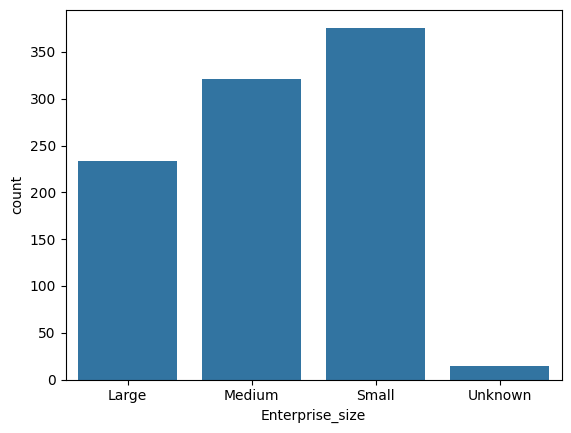

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Enterprise_size', data=jobs)
plt.show()


#### _**Key Insights**_:
 - Targeting **SMEs (Small and Medium Enterprises)** might be a strategic approach since they form the majority.
 - Large enterprises, while fewer, may have higher budgets and resources, making them valuable for business strategies.
 - The presence of "**Unknown**" data suggests that data quality checks might be necessary to improve accuracy.

### Top 10 cities with most headquarters of company.

Text(0, 0.5, 'No. of companies')

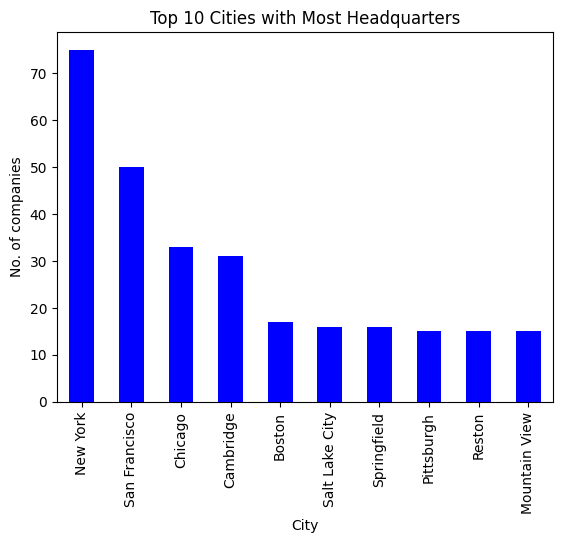

In [ ]:
jobs['Headquarters_City'].value_counts().head(10).plot(kind = 'bar', color = 'blue',)
plt.title('Top 10 Cities with Most Headquarters')
plt.xlabel('City')
plt.ylabel('No. of companies')

#### _**Key Insights:**_


*   We can deduce the fact that most of companies choose to stay in New York since it is the global bussiness hub.
*   All the mentioned cities have different geographical location which indicates that geography does not play crutial role for deciding company's location.
  



### Dominance across the Job Market
The following Pie chart is made to assess which countries greatly influence the IT Job Market.

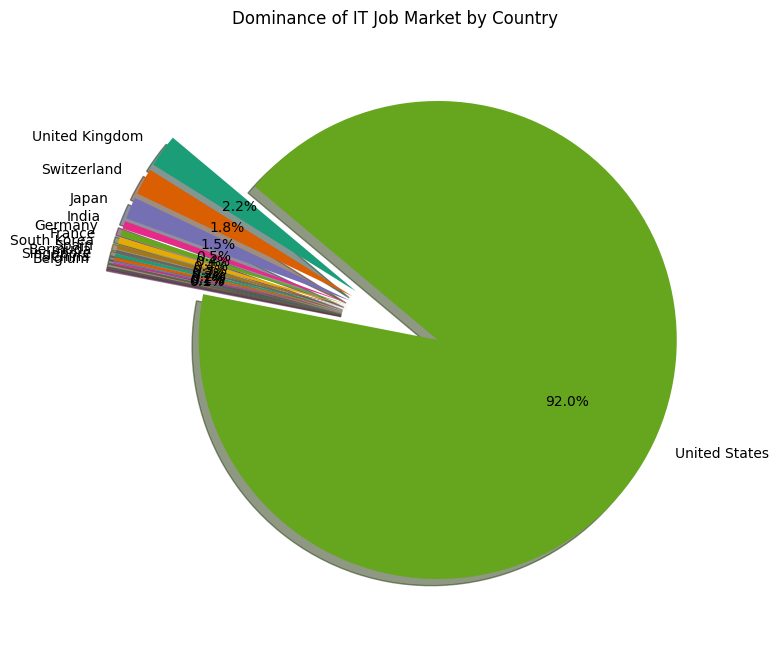

In [ ]:
def sum_states(jobs):
    """Consolidate U.S. state job counts into a single 'United States' category."""
    # Identify U.S. states (2-character codes) and count jobs
    us_states = [st for st in jobs['Headquarters_State'] if len(str(st)) == 2]
    state_counts = pd.Series(us_states).value_counts()

    # Create final dictionary, summing U.S. states into 'United States'
    final_dict = jobs['Headquarters_State'].value_counts().to_dict()
    us_total = state_counts.sum() if not state_counts.empty else 0
    if us_total > 0:
        final_dict['United States'] = us_total
        # Remove individual state entries
        for state in state_counts.index:
            final_dict.pop(state, None)

    return final_dict

final_dict = sum_states(jobs)

# Create pie chart
labels = list(final_dict.keys())
sizes = list(final_dict.values())
colors = plt.cm.Dark2.colors  # Use colormap for colors
explode = [0.2 if label == 'United States' else 0.2 for label in labels]  # Slightly more explode for U.S.

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio for a circle
plt.title('Dominance of IT Job Market by Country')
plt.show()



#### _**Key Insights**_:
- **U.S. Dominance:** The United States holds 92.0% of the global IT job market, making it the clear leader.
- **Limited Global Spread:** Other countries (e.g., UK 2.2%, Switzerland 1.8%) have small shares, indicating a concentrated market.
- **Regional Opportunities:** Countries like Germany, Japan, and South Korea offer niche IT strengths for specialization or outsourcing.
- **Talent and Strategy**: Businesses should focus on U.S. opportunities but diversify to mitigate risks and retain global talent.

### Salary range accross different company type

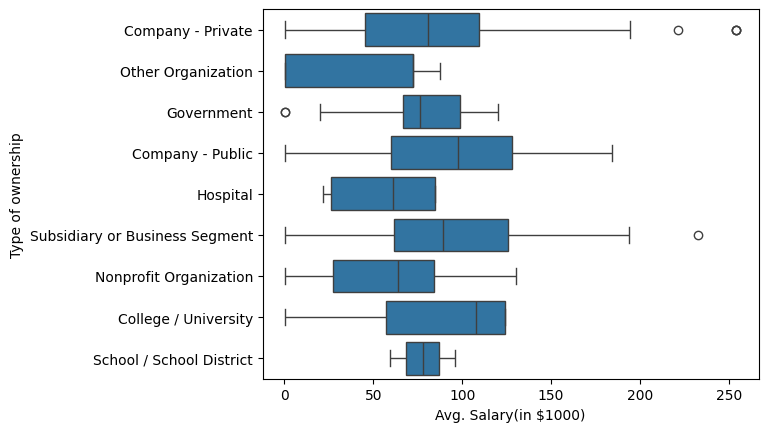

In [ ]:
data = jobs.loc[~jobs['Type of ownership'].isin(['Contract', 'Private Practice / Firm', 'Unknown']), ['Avg. Salary(in $1000)', 'Type of ownership']]
sns.boxplot(x=data['Avg. Salary(in $1000)'], y=data['Type of ownership'], data=data)
plt.show()

#### _**Key Insights:**_


*  Salary fluctuates a lot in most of the company type except for school and government.

*   There is more uncertainity in average salary for someone working in college compared to school.
* Private, public, bussiness companies and college provide better salary compared to other type of organisation.

### Number of Job Listings by Industry
The follwing countplot gives the distribution of Job roles across different Industries.

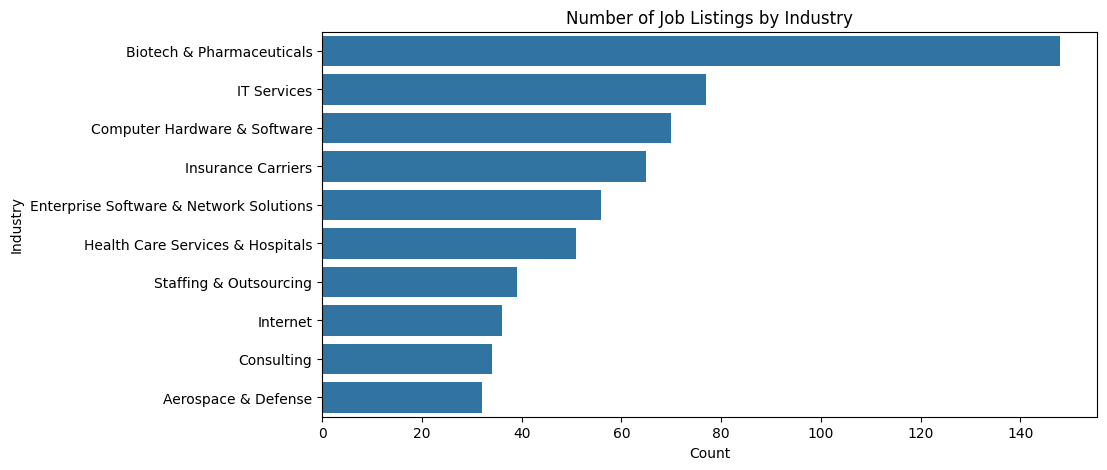

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=jobs['Industry'], order=jobs['Industry'].value_counts().index[:10])
plt.title('Number of Job Listings by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()


####_**Key Insights:**_
* **Biotech & Pharmaceuticals** have the highest job listings, followed by **IT Services and Computer Hardware & Software.**
* Industries like **Aerospace & Defense, Consulting, and Internet** have fewer job openings.
* **High-demand** industries (like Biotech & IT) may offer **more opportunities**, while niche industries may require specialized skills.

### Jobs by Company Types

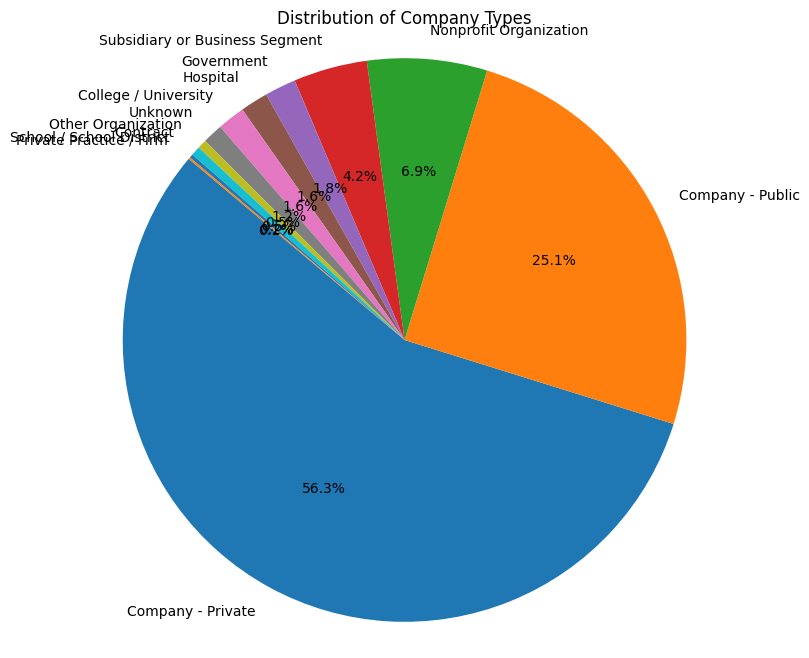

In [ ]:
plt.figure(figsize=(8,8))
ownership_counts = jobs['Type of ownership'].value_counts()
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### _**Key Insights:**_
- **Private Companies Dominate** – The majority (56.3%) of job opportunities come from private-sector employers, making them the largest contributor.

- **Public Companies Hold a Significant Share** – Public companies account for 25.1%, making them the second-largest category but far behind private firms.

- **Nonprofit & Specialized Sectors Are Limited** – Nonprofits (6.9%), hospitals, government, and universities have a relatively smaller presence in the dataset.

- **Niche Sectors Have Minimal Representation** – Private Practices, Schools, and Other Organizations contribute only a tiny fraction, suggesting fewer opportunities or less reported data.

- **Implications for Job Seekers & Employers**– Job seekers should target private and public companies, while smaller sectors may need stronger recruitment efforts to attract talent.

### Scatter Plot of Rating vs. Average Salary
The scatter plot presents a visualization of Rating vs. Average Salary, categorized by organization type (denoted by different colors).


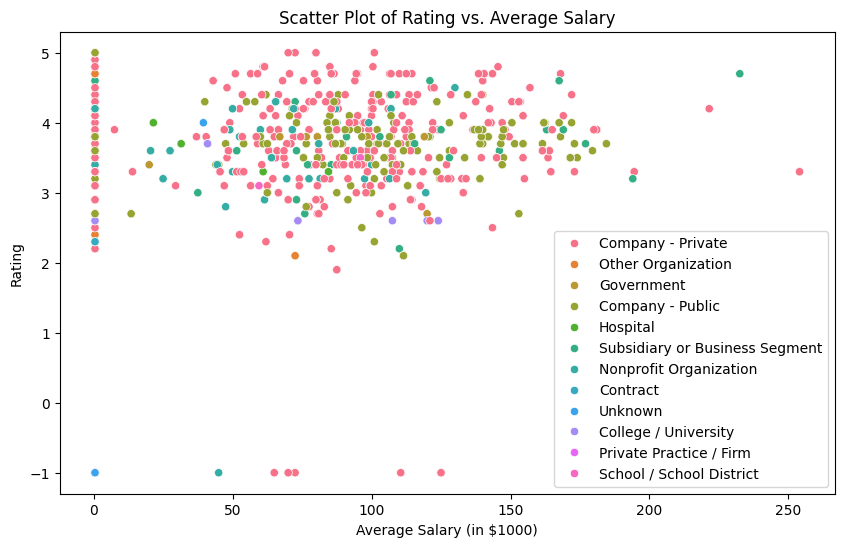

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. Salary(in $1000)', y='Rating', data=jobs, hue='Type of ownership')
plt.title('Scatter Plot of Rating vs. Average Salary')
plt.xlabel('Average Salary (in $1000)')
plt.ylabel('Rating')
plt.legend()
plt.show()

#### _**Key insights:-**_
 - The majority of ratings fall in the **3 to 5** range.
 - Salaries are mostly between **\$50k to \$150k**, with some outliers above **$200k**.
 - **Private and Public companies** tend to offer higher salaries.
 - Higher salaries do not necessarily correlate with higher ratings.

### Job titles and average salary

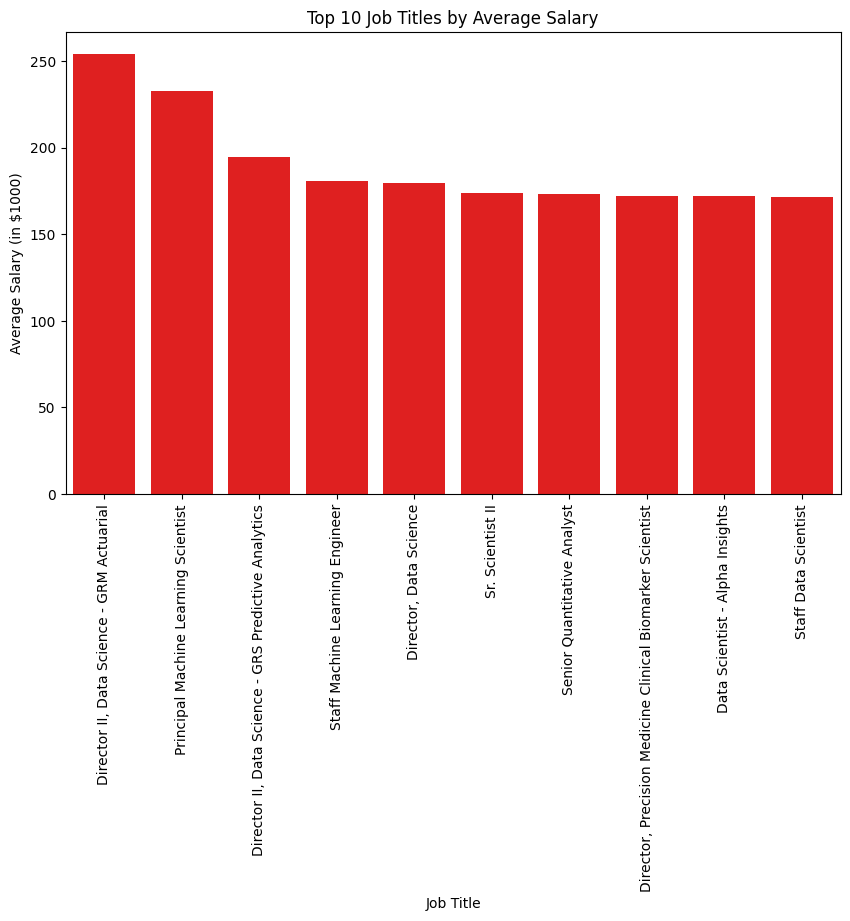

In [ ]:
# calculating the average salaries for each job title
avg_sal = jobs.groupby('Job Title')['Avg. Salary(in $1000)'].mean().reset_index()

# sorting by average salaries and getting top 10 most paying job roles
top_jobs = avg_sal.sort_values(by='Avg. Salary(in $1000)', ascending=False).head(10)

#plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Title', y='Avg. Salary(in $1000)', data=top_jobs, color='red')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (in $1000)')
plt.xticks(rotation=90)
plt.show()

#### _**Key insights:-**_
- **High Demand and Value for Data Science and Machine Learning Roles:** The chart overwhelmingly features titles in data science, machine learning, and related fields. This highlights the strong demand and high value placed on these skills in the current market.

- **Experience and Seniority Matter Significantly:**  Titles like "Principal," "Senior," and "Staff" appear frequently, demonstrating that experience and seniority are crucial factors in earning potential within these fields.

-  Companies are heavily investing in data-driven decision making and strategies. This implies that businesses recognize the competitive advantage that comes from effectively leveraging data and are prioritizing talent acquisition in this area.

### Distribution of Average Salary
Histogram helps understand salary distribution and identify common salary ranges.


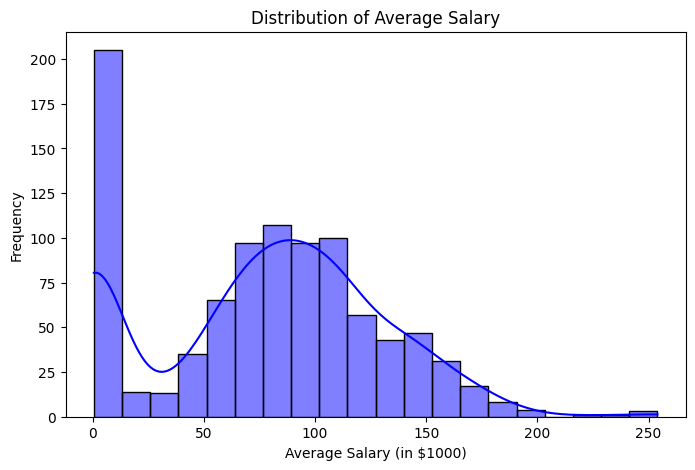

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(jobs['Avg. Salary(in $1000)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (in $1000)')
plt.ylabel('Frequency')
plt.show()



#### _**Key Insights:**_
*   Most jobs have low to mid-range salaries, but a few high-paying jobs exist.
* There are different salary groups, likely based on industry or experience levels.
* Businesses and job seekers can use this data to set fair salaries, negotiate better pay, and spot salary trends.



### Number of Jobs by Revenue of the Company

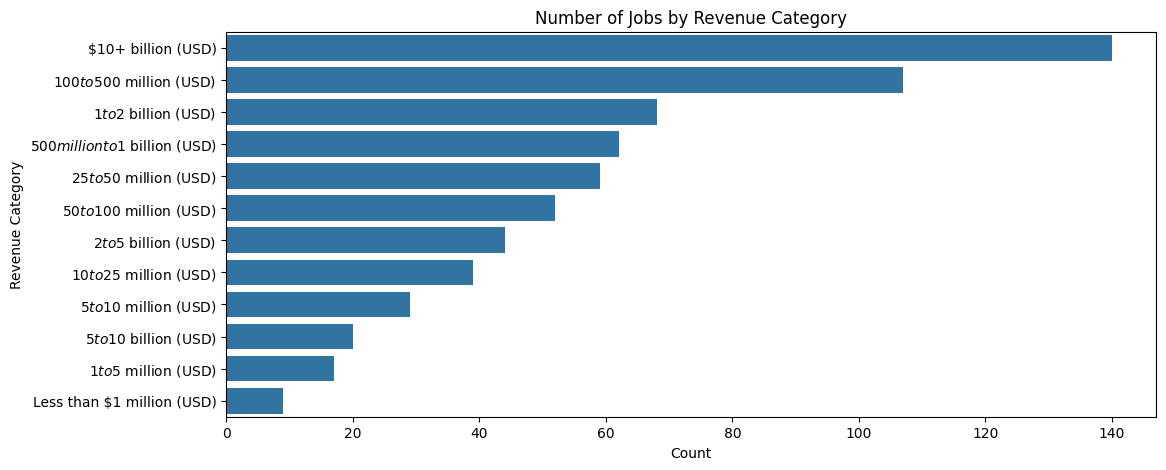

In [ ]:
plt.figure(figsize=(12,5))
jobs_filtered = jobs[jobs['Revenue'] != 'Unknown / Non-Applicable']
sns.countplot(y=jobs_filtered['Revenue'], order=jobs_filtered['Revenue'].value_counts().index)
plt.title('Number of Jobs by Revenue Category')
plt.xlabel('Count')
plt.ylabel('Revenue Category')
plt.show()

#### _**Key Insights:**_
* Most jobs are in companies with **very high revenues** (\$10+billion  & \$100–500 million).
* Fewer job listings exist in smaller companies (less than $1 million in revenue).
* **Larger companies seem to offer more job opportunities**, possibly due to their resources and expansion.

### Average Salary by Sector
A bar chart helps compare salaries across different sectors (e.g., Healthcare, Tech, Energy).


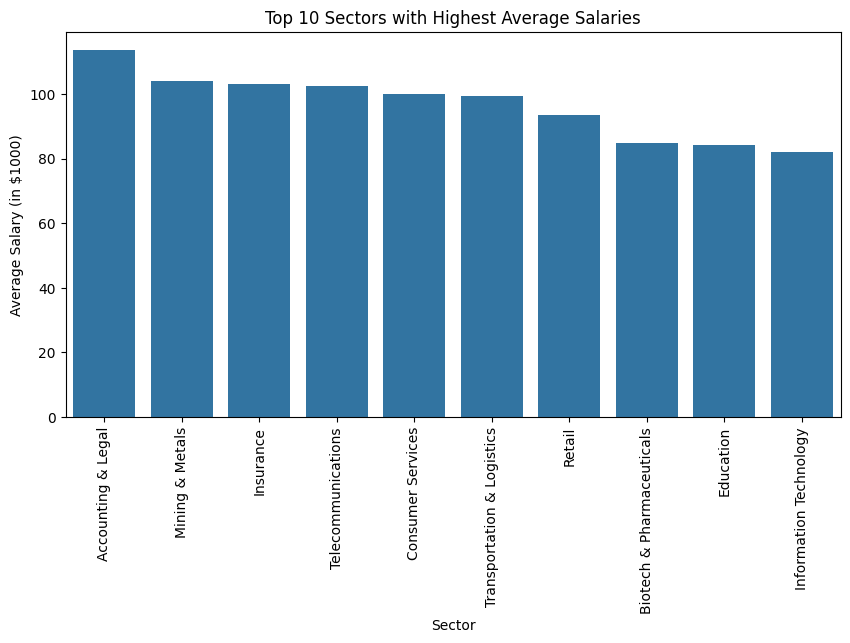

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=jobs.groupby('Sector')['Avg. Salary(in $1000)'].mean().sort_values(ascending=False).index[:10],
            y=jobs.groupby('Sector')['Avg. Salary(in $1000)'].mean().sort_values(ascending=False).values[:10],
            )
plt.xticks(rotation=90)
plt.title('Top 10 Sectors with Highest Average Salaries')
plt.xlabel('Sector')
plt.ylabel('Average Salary (in $1000)')
plt.show()


#### _**Key Insights:**_
* **Accounting & Legal** has the highest average salary, followed by **Mining & Metals and Insurance.**
* **Technology and Education** sectors have the lowest salaries among the top 10 highest-paying sectors.
* **High-paying sectors often require specialized expertise, making them attractive for professionals seeking financial growth.**

### Dumbbell Plot for Salary Range by Top 10 most frequent Job Title

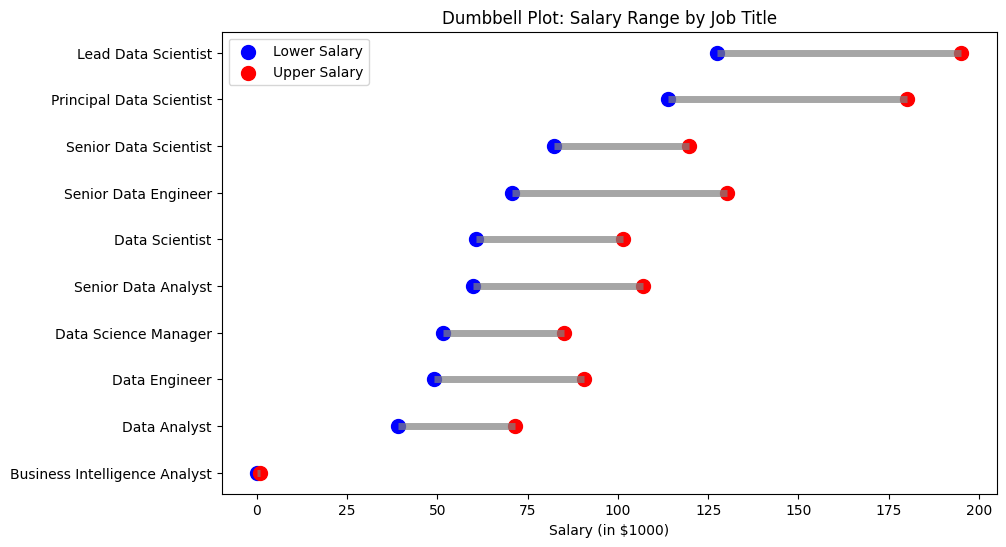

In [ ]:
# Compute average salary bounds for top 10 most frequent job titles
top_jobs = jobs['Job Title'].value_counts().index[:10]
dumbbell = jobs[jobs['Job Title'].isin(top_jobs)].groupby('Job Title').agg({
    'Salary (Lower in $1000)': 'mean',
    'Salary (Upper in $1000)': 'mean'
}).reset_index().sort_values('Salary (Lower in $1000)')

plt.figure(figsize=(10,6))
plt.hlines(y=dumbbell['Job Title'], xmin=dumbbell['Salary (Lower in $1000)'], xmax=dumbbell['Salary (Upper in $1000)'], color='grey', alpha=0.7, linewidth=5)
plt.scatter(dumbbell['Salary (Lower in $1000)'], dumbbell['Job Title'], color='blue', s=100, label='Lower Salary')
plt.scatter(dumbbell['Salary (Upper in $1000)'], dumbbell['Job Title'], color='red', s=100, label='Upper Salary')
plt.title('Dumbbell Plot: Salary Range by Job Title')
plt.xlabel('Salary (in $1000)')
plt.legend()
plt.show()


#### **Key Insights**
* **Lead Data Scientist** has the highest salary range, reaching nearly **$200K**.

* The biggest **salary gaps** (difference between lower and upper salary) are seen in **Senior Data Scientist** and **Lead Data Scientist**, showing high earning potential.

* **Data Science** roles generally offer high salaries, with most positions exceeding **$75K**.

* For the role of **Business Intelligence Analyst**, we dont have any informaion about its salary distribution. It may be the case that the recruiters have posted the job openings by marking the salaries as **Negotiable** or it may be a job post like **Unpaid Intern/Incentive based salaries** etc.

### Bubble Graph
The following Bubble graph has been used to show the relationship between the **Jobs** by top **10 States**, **Average Revenue** generated and the **Job Ratings**.

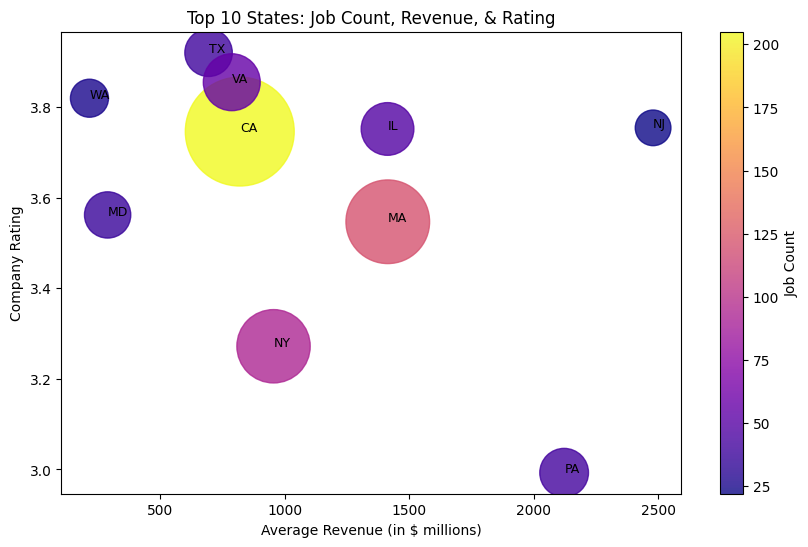

In [ ]:
# Select top 10 states by number of job listings
top_states = jobs['State'].value_counts().head(10).index.tolist()

# Aggregate data for these states
state_stats = jobs[jobs['State'].isin(top_states)].groupby('State').agg({
    'avg_Revenue(in $ millions)': 'mean',  # Use the correct revenue column
    'Rating': 'mean',
    'State': 'count'
}).rename(columns={'State': 'Job_Count'}).reset_index()

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    state_stats['avg_Revenue(in $ millions)'],  # X-axis: Revenue
    state_stats['Rating'],  # Y-axis: Company Rating
    s=state_stats['Job_Count']*30,  # Bubble size scaled by job count
    alpha=0.8,
    c=state_stats['Job_Count'],  # Color based on job count
    cmap='plasma'
)
plt.xlabel('Average Revenue (in $ millions)')  # Updated label
plt.ylabel('Company Rating')
plt.title('Top 10 States: Job Count, Revenue, & Rating')

# Annotate bubbles with state names
for idx, row in state_stats.iterrows():
    plt.text(row['avg_Revenue(in $ millions)']+0.5, row['Rating'], row['State'], fontsize=9)

plt.colorbar(scatter, label='Job Count')
plt.show()


#### _**Key Insights:**_
* **California (CA) has the highest job count (202) with moderate revenue (913M) and a decent rating (3.75)**, showing strong job availability without extreme corporate dominance.

* **New Jersey (NJ) leads in revenue (2475M) but has few jobs (22), indicating selective hiring.** Its high rating (3.85) suggests good workplace satisfaction despite limited openings.

* Texas (TX) and Virginia (VA) have balanced job counts (54, 60) with strong ratings (3.92, 3.90), making them attractive for both opportunities and work environment.

* **Pennsylvania (PA) has the second-highest revenue (2184M) but the lowest rating (3.02)**, suggesting **workplace dissatisfaction despite financial strength.**

### Distribution of Companies
The following bargraph shows the distribution of companies founded over the years.

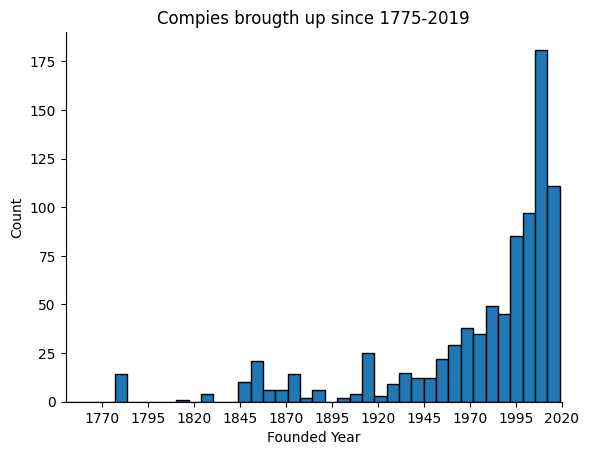

In [ ]:
from matplotlib import pyplot as plt
jobs['Founded'].plot(kind='hist', bins=300, title='Compies brougth up since 1775-2019', edgecolor='black')
plt.xlim((1750,2020))
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.xticks(np.arange(1770, 2025, 25))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

#### _**Key Insights:**_
 - There is a notable surge in the count of companies founded, especially after the 1980s.
 - The highest count occurs around 2010, indicating a significant draw of companies founded during that period.
 - The graph also suggest that there was a sudden boom in the IT and Technological sectors around the time period of **1995 - 2010** as a huge spikes in new companies founded is seen.

### Variation of Average Salaries by Job Locations
The following histogram shows the variation of average Salaries across different Job Locations in the United States.

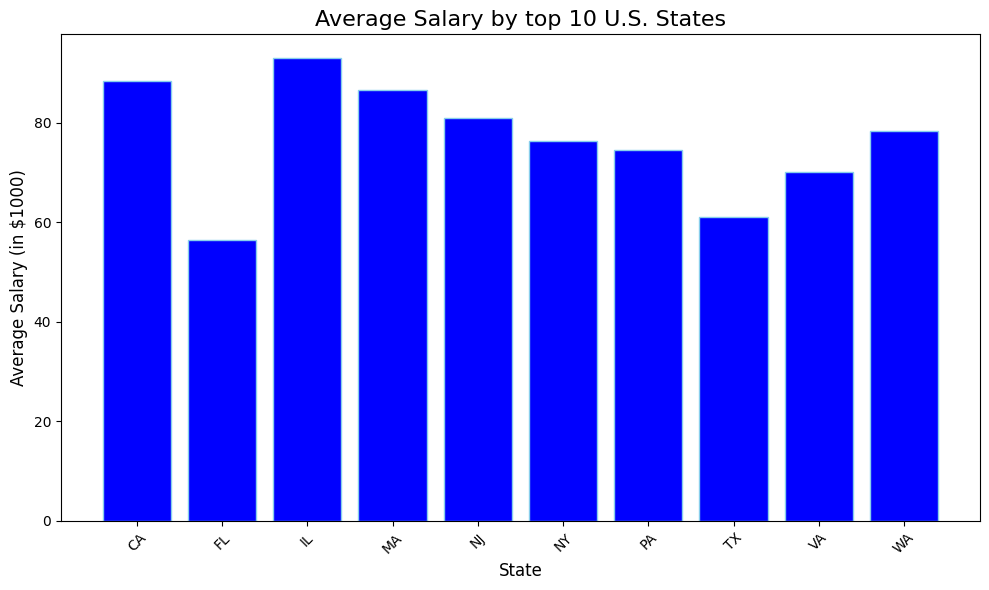

In [ ]:
# filtering data on the basis of top 10 states in the United States
top_10_abb = ["CA", "FL", "IL", "MA", "NJ", "NY", "PA", "TX", "VA", "WA"]
avg_salaries_by_state = jobs.groupby('State')['Avg. Salary(in $1000)'].mean().reset_index()
avg_salaries_by_state= avg_salaries_by_state.loc[avg_salaries_by_state['State'].isin(top_10_abb), ['State', 'Avg. Salary(in $1000)']]

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Increase figure size for better clarity
plt.bar(avg_salaries_by_state['State'], avg_salaries_by_state['Avg. Salary(in $1000)'], color='blue', edgecolor='skyblue')
plt.title('Average Salary by top 10 U.S. States')
plt.xlabel('State')
plt.ylabel('Average Salary (in $1000)')
plt.xticks(rotation=45)

# Adding titles and labels
plt.title('Average Salary by top 10 U.S. States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Salary (in $1000)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # To ensure everything fits in the plot
plt.show()

#### _**Key Insights:**_

 - **Consistency Across States:** The chart indicates that salaries are relatively high across all top states, qualifying them as significant players in the job market.

 - **Potential Insights for Job Seekers:** Individuals looking for **higher salaries** might prioritize **California, Massachusetts, or New York**.

 - **Regional Economic Factors:** **The variation in average salaries can be reflective of the cost of living**, industry presence, and economic activity within each state.

 - **Strategic Planning:** Companies can strategize their compensation packages based on these insights to remain competitive in retaining and attracting employees.

# **Conclusion of Data Analysis Project**

## Key Findings  

1. **Understanding Salary Trends:**

 - The analysis successfully highlighted significant variations in salary based on job roles, locations, company sizes, and industries, providing valuable insights for job seekers and employers alike.

2. **Data-Driven Insights:**

 - By developing predictive models such as Linear Regression and Decision Trees, the project can estimate salary ranges effectively, facilitating informed decisions for job seekers to make informed career decisions and assists employers in setting competitive salary benchmarks.

3. **Business Objectives Alignment:**

 - **For Job Seekers:** The insights gained can help individuals assess their salary expectations against various roles and industries.
 - **For Employers:** Organizations can utilize detailed salary benchmarking to formulate attractive compensation packages to attract and retain top talent.
 - **For Analysts and Researchers:** The findings contribute to a broader understanding of salary trends, useful for academic studies or market research.

4. **Market Insights:**

 - High demand for specific job roles in technology and data science indicates a growing job market in these areas. Companies should focus on recruiting talent in these sectors to stay competitive.

4. **Geographical Salary Trends:**

 - Industries should consider regional economic factors and cost of living when planning compensations. Top states like California and Massachusetts show higher average salaries, suggesting targeted recruitment might yield better results in these areas.  

## Recommendations for Achieving Business Objectives

 1. **Enhance Salary Benchmarking Practices**
- Clients should implement data-driven salary benchmarking best practices.
- Leverage insights from the analysis to ensure competitive pay structures.

 2. **Targeted Recruitment Strategies**
- Focus recruitment efforts on high-demand job roles identified in the analysis.
- Specifically target the technology and healthcare sectors to attract skilled candidates.

 3.**Data Quality Improvements**
- Regularly review and update salary data to maintain accuracy and relevancy.
- Ensure strategic decisions are based on the latest information.

 4. **Invest in Employee Development**
- Encourage the upskilling of current employees, particularly in data science and IT.
- Fill talent gaps and enhance overall employee satisfaction.

 5. **Implement a Comprehensive Communication Strategy**
- Regularly communicate findings from salary analyses to all stakeholders.
- Align recruitment and compensation strategies with market realities.


By focusing on these recommendations, the client can leverage analysis insights to meet business objectives effectively and position themselves favorably in the competitive job market.
